In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Loan%20Eligibility%20Prediction.csv')
df

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,480,Male,Yes,2,Graduate,No,2947,1603.0,10,360,1,Urban,N
610,525,Male,No,0,Graduate,No,4680,2087.0,15,360,1,Semiurban,N
611,551,Male,Yes,2,Graduate,Yes,6633,0.0,25,360,0,Rural,N
612,552,Male,Yes,1,Not Graduate,No,2492,2375.0,30,360,1,Rural,Y


##подготовка датасета

In [3]:
# обращаем столбцы типа object в бинарные
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data = df.copy()
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = encoder.fit_transform(data[col])
data.head()
data

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,0,0,0,0,0,2378,0.0,9,360,1,2,0
1,15,1,1,2,0,0,1299,1086.0,17,120,1,2,1
2,95,1,0,0,1,0,3620,0.0,25,120,1,1,1
3,134,1,1,0,0,1,3459,0.0,25,120,1,1,1
4,556,1,1,1,0,0,5468,1032.0,26,360,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,480,1,1,2,0,0,2947,1603.0,10,360,1,2,0
610,525,1,0,0,0,0,4680,2087.0,15,360,1,1,0
611,551,1,1,2,0,1,6633,0.0,25,360,0,0,0
612,552,1,1,1,1,0,2492,2375.0,30,360,1,0,1


In [4]:
#чистим выборку от выбросов по целевой переменной
clean_data = data[(data['Loan_Status']>=data['Loan_Status'].quantile(0.05))&(data['Loan_Status']<=data['Loan_Status'].quantile(0.95))]

##разделим данные на обучающую и тестовую выборки для двух переменных, стандартизируем обучающую выборку

In [33]:
cld=clean_data
features = ['Applicant_Income', 'Loan_Amount']
target = ['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(cld[features], cld[target], test_size=0.25, random_state = 28)
scaler = StandardScaler().fit(x_train)
x_scaled = scaler.transform(x_train)


PCA для n_components = 1

<Axes: xlabel='C1'>

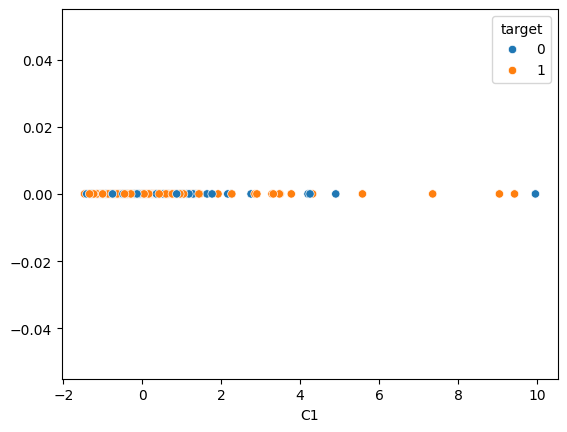

In [34]:
pca = PCA (n_components = 1, random_state = 42)
x_pca = pca.fit_transform(x_scaled)

pca_df = pd.DataFrame(x_pca, columns = ['C1'], index = x_train.index)
pca_df['target'] = y_train.values.ravel()

sns.scatterplot(data = pca_df, x = 'C1', y = 0, hue = 'target')

PCA для n_components = 2

<Axes: xlabel='C1', ylabel='C2'>

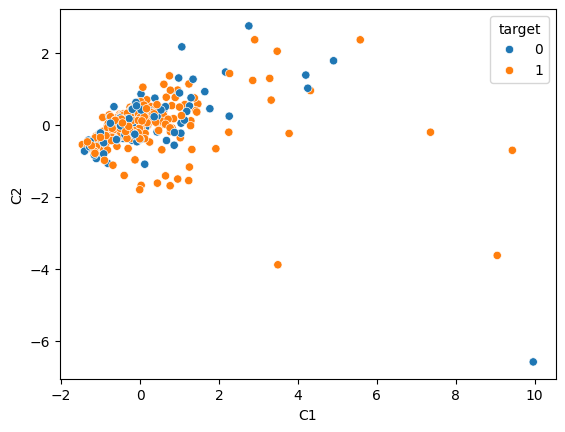

In [35]:
pca = PCA (n_components = 2, random_state = 42)
x_pca = pca.fit_transform(x_scaled)

pca_df = pd.DataFrame(x_pca, columns = ['C1','C2'], index = x_train.index)
pca_df['target'] = y_train.values.ravel()

sns.scatterplot(data = pca_df, x = 'C1', y = 'C2', hue = 'target')

PCA не помог кластеризовать данных для двух переменных

введем 5 переменных в модель и стандартизуем обучаемую выборку

In [69]:
cld=clean_data
features = ['Applicant_Income', 'Loan_Amount', 'Loan_Amount', 'Loan_Amount_Term', 'Credit_History']
target = ['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(cld[features], cld[target], test_size=0.25, random_state = 28)
scaler = StandardScaler().fit(x_train)
x_scaled = scaler.transform(x_train)




##метод главных компонент (PCA) для 5 переменных

PCA для n_components = 1

<Axes: xlabel='C1'>

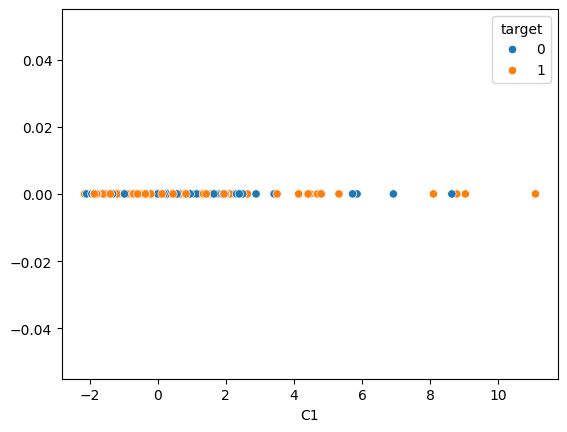

In [45]:
pca = PCA (n_components = 1, random_state = 42)
x_pca = pca.fit_transform(x_scaled)

pca_df = pd.DataFrame(x_pca, columns = ['C1'], index = x_train.index)
pca_df['target'] = y_train.values.ravel()

sns.scatterplot(data = pca_df, x = 'C1', y = 0, hue = 'target')

PCA для n_components = 2

<Axes: xlabel='C1', ylabel='C2'>

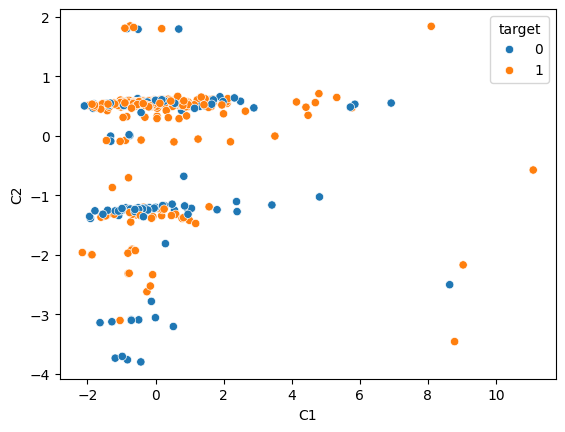

In [46]:
pca = PCA (n_components = 2, random_state = 42)
x_pca = pca.fit_transform(x_scaled)

pca_df = pd.DataFrame(x_pca, columns = ['C1','C2'], index = x_train.index)
pca_df['target'] = y_train.values.ravel()

sns.scatterplot(data = pca_df, x = 'C1', y = 'C2', hue = 'target')

PCA с 2 компонентами лучше, чем 1 компонент. Похоже, что PCA группирует данные минимум на 6 кластеров:  

1.  С1 $\in$ (-1.5,0.5) и С2 $\approx$ 1.8
2.  С1 $\in$ (-2,3) и С2 $\approx$ 0.5 (смешанный состав классов)
3.  С1 $\in$ (-1,3) и С2 $\approx$ 0
4. С1 $\in$ (-2,1) и С2 $\approx$ -1.2 (смешанный состав классов)
5. С1 $\in$ (-2,1) и С2 $\approx$ -3
6.  С1 $\in$ (-1.5,0) и С2 $\approx$ -3.8


##сравним результат PCA с исходными данными

In [47]:
# Объединяем исходные данные в один датасет
X = np.vstack([cld[col].values for col in features]).T

график в 3D исходных данных

/tmp/ipython-input-1311580726.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], X[:, 2], cmap='coolwarm', s=50)


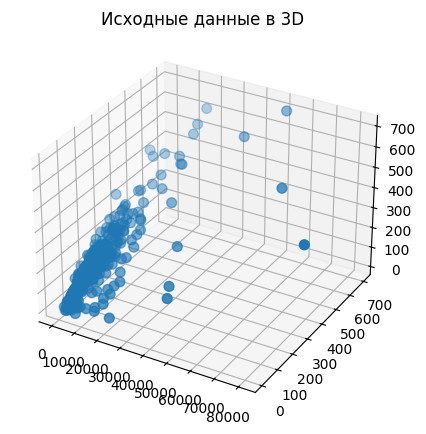

In [54]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], cmap='coolwarm', s=50)
ax.set_title("Исходные данные в 3D")
plt.show()

в исходных данных кластера данных в пространстве 3D не наблюдаются

##tSNE модель для 5 переменных

<Axes: xlabel='C1', ylabel='C2'>

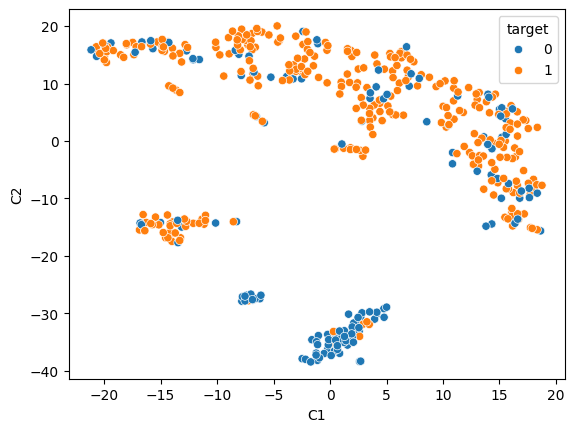

In [74]:
tsne = TSNE(n_components = 2, random_state = 42)
X_tsne = tsne.fit_transform(x_scaled)

tsne_df = pd.DataFrame(X_tsne, columns = ['C1', 'C2'], index = x_train.index)
tsne_df['target'] = y_train

sns.scatterplot(data = tsne_df, x = 'C1', y = 'C2', hue = 'target')

tSNE модель c двумя компонентами не разделила основной массив данных на кластера разных классов. Кроме большого облака данных обоих классов в диапазоне от -10 до 20 для C2 и -20 до 20 для C1, наблюдается только три небольших кластера, в которых большинство данных преимущественно одного класса.

##применим perplexity для TSNE модели

<Axes: xlabel='C1', ylabel='C2'>

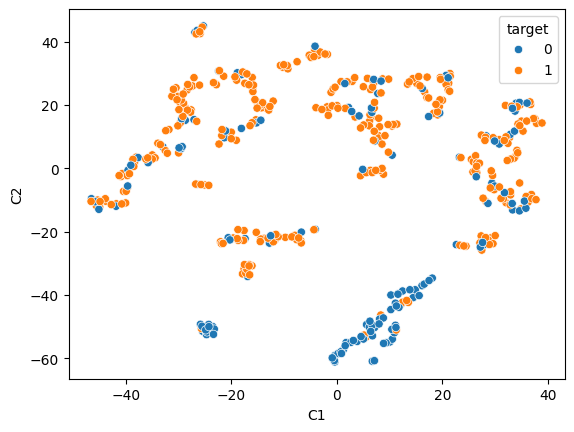

In [71]:
tsne = TSNE(n_components = 2, perplexity = 10, random_state = 42)
X_tsne = tsne.fit_transform(x_scaled)

tsne_df = pd.DataFrame(X_tsne, columns = ['C1', 'C2'], index = x_train.index)
tsne_df['target'] = y_train

sns.scatterplot(data = tsne_df, x = 'C1', y = 'C2', hue = 'target')

tSNE модель c двумя компонентами и perplexity показала наконец разделение на кластера, в каждом из которых наблюдается большинство переменных одного из двух классов целевой перменной

увеличим perplexity

<Axes: xlabel='C1', ylabel='C2'>

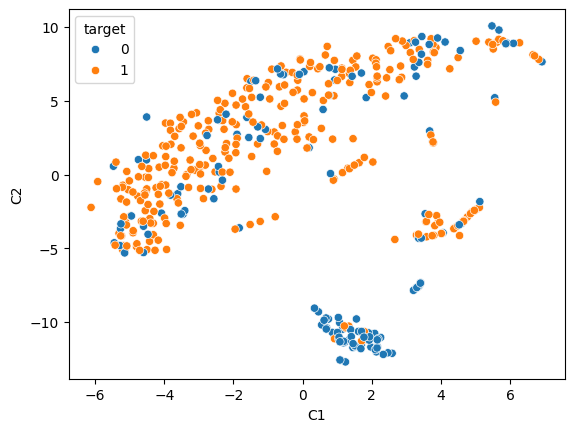

In [72]:
tsne = TSNE(n_components = 2, random_state = 42, perplexity = 100)
X_tsne = tsne.fit_transform(x_scaled)

tsne_df = pd.DataFrame(X_tsne, columns = ['C1', 'C2'], index = x_train.index)
tsne_df['target'] = y_train

sns.scatterplot(data = tsne_df, x = 'C1', y = 'C2', hue = 'target')

увеличенный perplexity объединил кластера, лежавшие выше -10 для C2 в один кластер

##подберем гиперпараметры для системы с 5 переменными

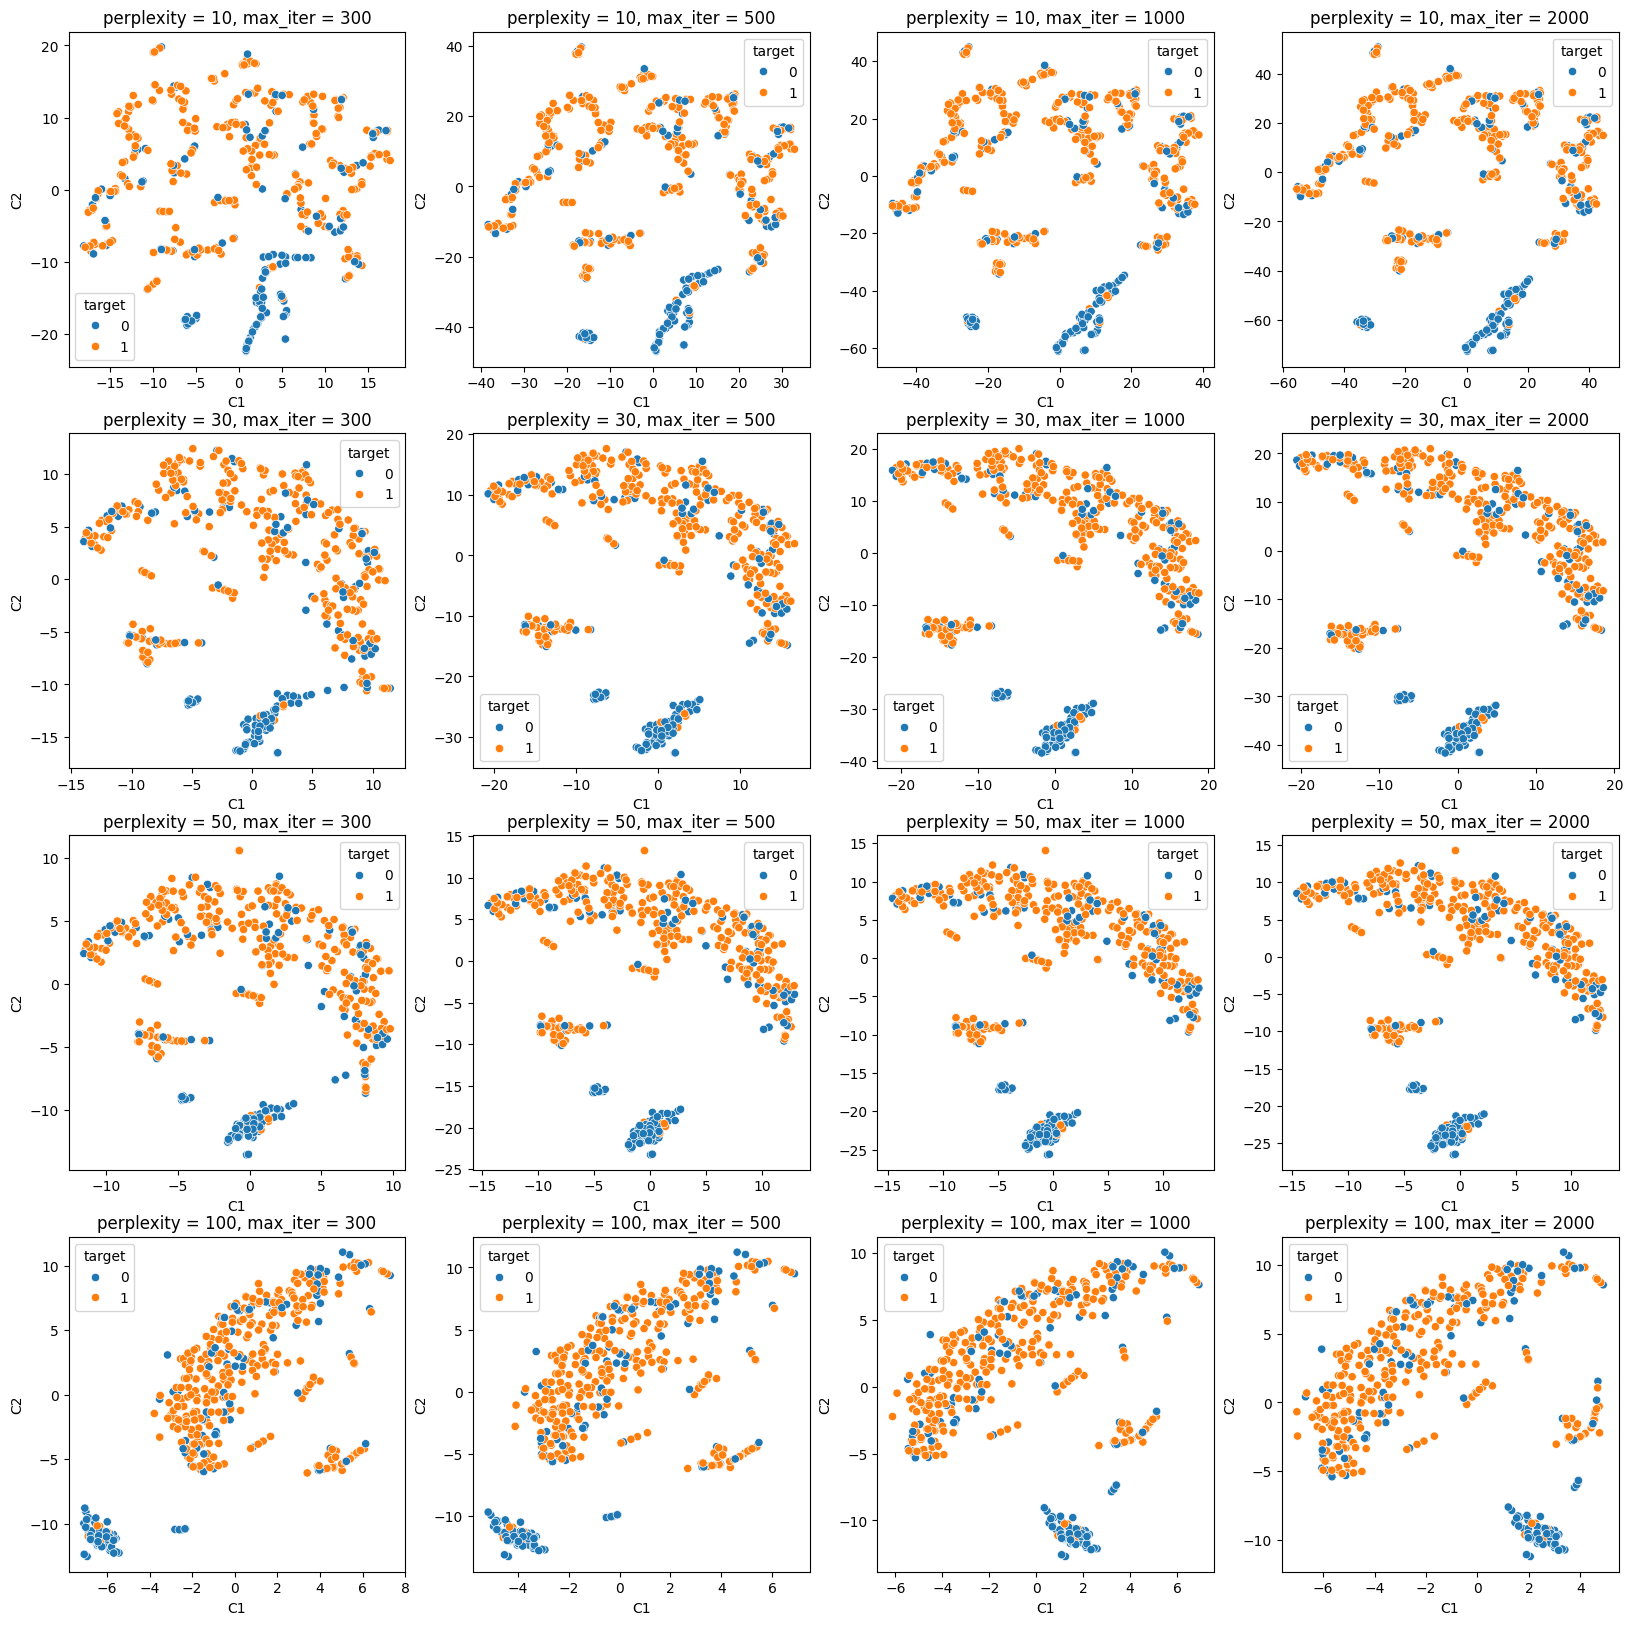

In [73]:
fig, ax = plt.subplots(4, 4, figsize = (20, 20))
r = 0
for perplexity in [10, 30, 50, 100]:
  c = 0
  for max_iter in [300, 500, 1000, 2000]:
    tsne = TSNE(n_components = 2, random_state = 42, perplexity = perplexity, max_iter = max_iter)
    X_tsne = tsne.fit_transform(x_scaled)

    tsne_df = pd.DataFrame(X_tsne, columns = ['C1', 'C2'], index = x_train.index)
    tsne_df['target'] = y_train
    sns.scatterplot(data = tsne_df, x = 'C1', y = 'C2', hue = 'target', ax = ax[r, c])
    ax[r,c].set_title(f'perplexity = {perplexity}, max_iter = {max_iter}')
    c += 1
  r += 1

4 значимые кластера появляются при perplexity = 30, max_iter = 500

###Отдельные группы наблюдений PCA показал только для модели с 5 переменными. для модели с 2 переменными PCA не показал кластеров, скорее всего из-за сильнйо корелляции переменных.
###TSNE модель разделила данные на 4 кластера без perplexity , при значении perplexity до 300 и max_iter до 500 модель пытается разделить данные на более чем 4 кластера, с показателями выше указанных модель снова разделяет данные на 4 кластера. PCA отражает данные наиболее полно, в ней наблюдается больше кластеров. Пока не ясно как интерпретировать данные TSNE модели из 4 кластеров, в котором сильное смешение данных двух классов.